In [104]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from datetime import datetime as dt

%matplotlib inline

# 整理数据

## 读取数据

In [105]:
vegetable_prices = pd.read_csv('vegetable_prices.csv')
vegetable_prices['updateTime'] = pd.to_datetime(vegetable_prices['updateTime'])
vegetable_prices.head()

,v_name,v_price,h_price,l_price,v_market,area,source,updateTime,insertTime,yWendu,bWendu,tianqi,fengli,fengxiang,aqi,aqiLevel,aqiInfo,cpi
0,大白菜,1.5,1.8,1.2,四川成都龙泉聚和(国际)果蔬菜交易中心,cd,vegnet.com.cn,2016-03-01,2018-04-19,6,19,晴,微风,南风,137,3,轻度污染,102.3
1,洋白菜,1.4,1.7,1.2,四川成都龙泉聚和(国际)果蔬菜交易中心,cd,vegnet.com.cn,2016-03-01,2018-04-19,6,19,晴,微风,南风,137,3,轻度污染,102.3
2,生菜,4.8,5.4,4.2,四川成都龙泉聚和(国际)果蔬菜交易中心,cd,vegnet.com.cn,2016-03-01,2018-04-19,6,19,晴,微风,南风,137,3,轻度污染,102.3
3,韭菜,5.2,5.5,4.8,四川成都龙泉聚和(国际)果蔬菜交易中心,cd,vegnet.com.cn,2016-03-01,2018-04-19,6,19,晴,微风,南风,137,3,轻度污染,102.3
4,白萝卜,1.4,1.7,1.1,四川成都龙泉聚和(国际)果蔬菜交易中心,cd,vegnet.com.cn,2016-03-01,2018-04-19,6,19,晴,微风,南风,137,3,轻度污染,102.3


In [106]:
vegetable_prices = vegetable_prices.drop(['v_market', 'area', 'source', 'insertTime', 'aqiInfo'], axis=1)

In [107]:
vegetable_prices.head()

,v_name,v_price,h_price,l_price,updateTime,yWendu,bWendu,tianqi,fengli,fengxiang,aqi,aqiLevel,cpi
0,大白菜,1.5,1.8,1.2,2016-03-01,6,19,晴,微风,南风,137,3,102.3
1,洋白菜,1.4,1.7,1.2,2016-03-01,6,19,晴,微风,南风,137,3,102.3
2,生菜,4.8,5.4,4.2,2016-03-01,6,19,晴,微风,南风,137,3,102.3
3,韭菜,5.2,5.5,4.8,2016-03-01,6,19,晴,微风,南风,137,3,102.3
4,白萝卜,1.4,1.7,1.1,2016-03-01,6,19,晴,微风,南风,137,3,102.3


In [108]:
vegetable_prices.describe()

,v_price,h_price,l_price,yWendu,bWendu,aqi,aqiLevel,cpi
count,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000
mean,4.277428,4.880379,3.842229,12.117615,19.887127,90.306098,2.278455,101.696125
std,2.944538,3.310784,2.755695,7.611643,7.909340,47.854366,0.961149,0.563632
min,0.800000,0.900000,0.700000,-4.000000,4.000000,25.000000,1.000000,100.800000
25%,2.000000,2.300000,1.800000,6.000000,13.000000,54.000000,2.000000,101.300000
50%,3.600000,4.000000,3.200000,12.000000,19.000000,79.000000,2.000000,101.400000
75%,5.000000,6.000000,4.500000,19.000000,27.000000,117.000000,3.000000,102.300000
max,16.500000,20.000000,16.000000,26.000000,36.000000,318.000000,6.000000,102.600000


## 检查数据缺失项

In [109]:
missing = vegetable_prices.isnull().sum()
ratio = vegetable_prices.isnull().sum() / float(len(vegetable_prices))
round_ratio = ratio.apply(lambda x: str(round(x, 4) * 100) + '%')
print(pd.concat([missing.rename('missing'), round_ratio.rename('percentage(%)')], axis = 'columns'))


            missing percentage(%)
v_name            0          0.0%
v_price           0          0.0%
h_price           0          0.0%
l_price           0          0.0%
updateTime        0          0.0%
yWendu            0          0.0%
bWendu            0          0.0%
tianqi            0          0.0%
fengli            0          0.0%
fengxiang         0          0.0%
aqi               0          0.0%
aqiLevel          0          0.0%
cpi               0          0.0%


通过对数据进行初步检查，没有发现异常记录和异常值。

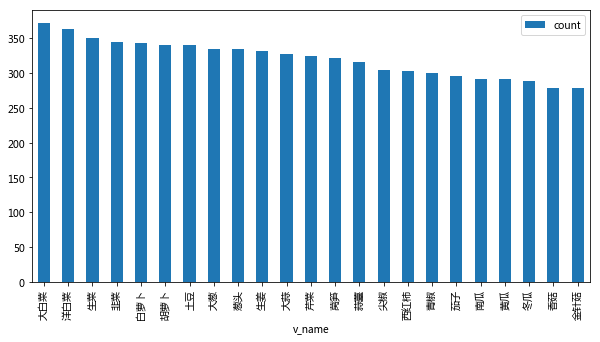

In [110]:
# vegetable_prices.groupby('v_name')['v_name'].count().plot(kind='bar', figsize=(10, 5))
group_by_name_count = vegetable_prices.groupby('v_name')['v_name'].count().reset_index(name='count').sort_values(['count'], ascending=False)
group_by_name_count.plot(kind='bar', x='v_name', figsize=(10, 5))

从柱状图上看，目前记录数量最多的是大白菜，洋白菜，生菜，韭菜，白萝卜和胡萝卜，现在我们以大白菜为例对数据进行进一步分析。

In [111]:
dabaicai_df = vegetable_prices[vegetable_prices['v_name'] == '大白菜']

感兴趣的问题：

1. 大白菜价格走势图（最高价，最低价）；

2. 大白菜价格与天气的关系；
3. 大白菜价格与温度的关系；
4. 大白菜价格与居民消费指数关系；
5. 大白菜价格与空气质量指数关系；

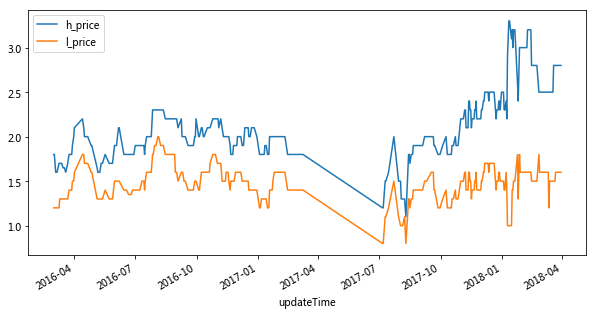

In [112]:

dabaicai_double_prices = dabaicai_df[['h_price', 'l_price', 'updateTime']]
# dabaicai_double_prices.plot()
dabaicai_double_prices.set_index('updateTime', inplace=True)
dabaicai_double_prices.plot(figsize=(10, 5))